In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [2]:
img_dir = 'C:/Users/riach/Projects/brain-tumor-detection/ML_model/Brain_Tumor_Data_Set'

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [42]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)

# data_gen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2,
#     rotation_range=30,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )


In [43]:
train_gen = data_gen.flow_from_directory(img_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         color_mode="grayscale",
                                         shuffle=True,
                                         class_mode="binary",
                                         subset="training")


Found 3681 images belonging to 2 classes.


In [44]:
val_gen = data_gen.flow_from_directory(img_dir,
                                       target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                       batch_size=BATCH_SIZE,
                                       color_mode="grayscale",
                                       shuffle=False,
                                       class_mode="binary",
                                       subset="validation")

Found 919 images belonging to 2 classes.


In [45]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain Tumor', 'Healthy']


# Making the model

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [47]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(150, 150, 1), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,239,489 (81.02 MB)

 Trainable params: 21,239,489 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen,
                    epochs=100,
                    validation_data=val_gen,
                    steps_per_epoch=3681 // BATCH_SIZE,
                    validation_steps=919 // BATCH_SIZE,
                    callbacks=early_stopping)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 876ms/step - accuracy: 0.5565 - loss: 5.5073 - val_accuracy: 0.7623 - val_loss: 0.9848
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6719 - loss: 1.0477 - val_accuracy: 0.6087 - val_loss: 1.0912
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 47s 807ms/step - accuracy: 0.7446 - loss: 0.9156 - val_accuracy: 0.7634 - val_loss: 0.7810
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.7950 - val_accuracy: 0.6087 - val_loss: 0.8884
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 48s 827ms/step - accuracy: 0.7718 - loss: 0.7782 - val_accuracy: 0.8170 - val_loss: 0.7412
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7969 - loss: 0.7306 - val_accuracy: 0.7826 - val_loss: 0.7038
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 843ms/step - accuracy: 0.7930 - loss: 0.7606 - val_accuracy: 0.8013 - val_loss: 0.6943
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.6641 - val_accuracy

In [51]:
#train_loss, train_acc = model.evaluate(train_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)
test_loss, test_acc   = model.evaluate(val_gen)

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.8294 - loss: 0.6353


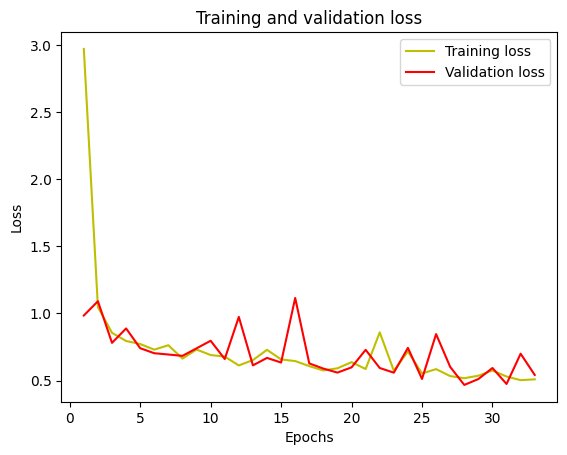

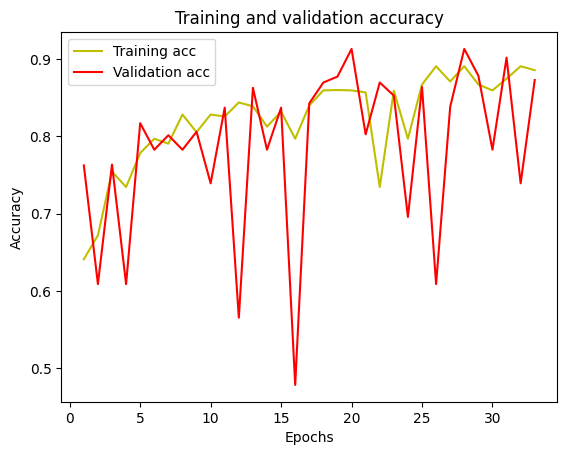

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
model.save('model.h5')

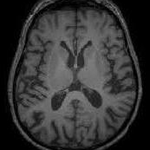

In [57]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
from IPython.display import display


data = np.ndarray(shape=(1,150, 150, 1), dtype=np.float32)
image = Image.open(f'C:/Users/riach\Projects/brain-tumor-detection/ML_model/Brain_Tumor_Data_Set/Healthy/Not Cancer  (1631).jpg')
# image = Image.open(f'C:/Users/riach\Projects/brain-tumor-detection/ML_model/Brain_Tumor_Data_Set/Brain_Tumor/Cancer (1895).jpg')
size = (150, 150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.LANCZOS)
image_array = np.asarray(image)
display(image)
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = image_array.reshape((-1,150,150,1))
#data[0] = normalized_image_array

In [58]:
prediction = model.predict(data)
print(prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1.0
